# *House Prices Analysis*

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from datetime import datetime,time
import os

In [3]:
df=pd.read_csv(r"Data_Set/raw_sales.csv")
df.head()


,datesold,postcode,price,propertyType,bedrooms
0,02/07/2007,2607,525000,house,4
1,02/27/2007,2906,290000,house,3
2,03/07/2007,2905,328000,house,3
3,03/09/2007,2905,380000,house,4
4,03/21/2007,2906,310000,house,3


---
### *Data Shape :*

In [4]:
df.shape

(29580, 5)

---
### *Data Info :*

In [5]:
# Show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


---
### *Data Cleaning :*
#### *Na-Values & Duplicated rows*

In [6]:
print("The Total Number of Null Values are : ", df.isna().sum().sum())
print("The Total Number of duplicated rows are : ", df.duplicated().sum())

The Total Number of Null Values are :  0
The Total Number of duplicated rows are :  0


#### *Data Transformation*

##### *Convert the 'datesold' feature into datetime type and set and index*
##### *Creating new feature with str values for the bedrooms feature*
##### *Converting the postcode feature into str*
##### *Rename & capitalize columns*

In [7]:
df["datesold"]=pd.to_datetime(df["datesold"])

df['bedrooms_str']=df['bedrooms'].replace([0,1,2,3,4,5],
                                           ["Without_bedrooms", "One_bedrooms","Two_bedrooms","Three_bedrooms","Four_bedrooms","Five_bedrooms"])

df["postcode"]=df["postcode"].astype("str")

df=df.rename(columns={'datesold': 'Date',
                       'propertyType': 'Property_Type',
                       'postcode':'Region_Code'
                       })

df.columns=df.columns.str.capitalize()

In [8]:
df.head()

,Date,Region_code,Price,Property_type,Bedrooms,Bedrooms_str
0,2007-02-07,2607,525000,house,4,Four_bedrooms
1,2007-02-27,2906,290000,house,3,Three_bedrooms
2,2007-03-07,2905,328000,house,3,Three_bedrooms
3,2007-03-09,2905,380000,house,4,Four_bedrooms
4,2007-03-21,2906,310000,house,3,Three_bedrooms


In [9]:
# Show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           29580 non-null  datetime64[ns]
 1   Region_code    29580 non-null  object        
 2   Price          29580 non-null  int64         
 3   Property_type  29580 non-null  object        
 4   Bedrooms       29580 non-null  int64         
 5   Bedrooms_str   29580 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


---
### *Features Engineering :* 
*1. Features Generation*
* *Creating copy of the data set with the following new Features:*  
*1. year.*   
*4. month_name.*  
*5. day_name.*  
*6. Price_Per_Bedrooms.*   

In [10]:
df_copy=df.copy()
df_copy["year"]=df_copy["Date"].dt.year.astype("str")
df_copy["month_name"]=df_copy["Date"].dt.month_name()
df_copy["day_name"]=df_copy["Date"].dt.day_name()
df_copy["Price_Per_Bedrooms"]=np.round(np.where(df_copy['Bedrooms'] != 0, df_copy['Price'] / df_copy['Bedrooms'], 0))

In [11]:
df_copy.head(5)

,Date,Region_code,Price,Property_type,Bedrooms,Bedrooms_str,year,month_name,day_name,Price_Per_Bedrooms
0,2007-02-07,2607,525000,house,4,Four_bedrooms,2007,February,Wednesday,131250.0
1,2007-02-27,2906,290000,house,3,Three_bedrooms,2007,February,Tuesday,96667.0
2,2007-03-07,2905,328000,house,3,Three_bedrooms,2007,March,Wednesday,109333.0
3,2007-03-09,2905,380000,house,4,Four_bedrooms,2007,March,Friday,95000.0
4,2007-03-21,2906,310000,house,3,Three_bedrooms,2007,March,Wednesday,103333.0


In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                29580 non-null  datetime64[ns]
 1   Region_code         29580 non-null  object        
 2   Price               29580 non-null  int64         
 3   Property_type       29580 non-null  object        
 4   Bedrooms            29580 non-null  int64         
 5   Bedrooms_str        29580 non-null  object        
 6   year                29580 non-null  object        
 7   month_name          29580 non-null  object        
 8   day_name            29580 non-null  object        
 9   Price_Per_Bedrooms  29580 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 2.3+ MB


---
### *EDA --Exploration data analysis ---> Descriptive Analysis*

#### *Numerical Features*

In [13]:
df_copy.describe()

,Date,Price,Bedrooms,Price_Per_Bedrooms
count,29580,2.958000e+04,29580.000000,2.958000e+04
mean,2015-02-21 07:35:42.474645248,6.097363e+05,3.250169,1.951427e+05
min,2007-02-07 00:00:00,5.650000e+04,0.000000,0.000000e+00
25%,2013-02-05 00:00:00,4.400000e+05,3.000000,1.452500e+05
50%,2015-09-30 00:00:00,5.500000e+05,3.000000,1.725000e+05
75%,2017-07-26 00:00:00,7.050000e+05,4.000000,2.175000e+05
max,2019-07-27 00:00:00,8.000000e+06,5.000000,2.280000e+06
std,NaN,2.817079e+05,0.951275,8.187545e+04


##### *Visualzing Numerical Features*

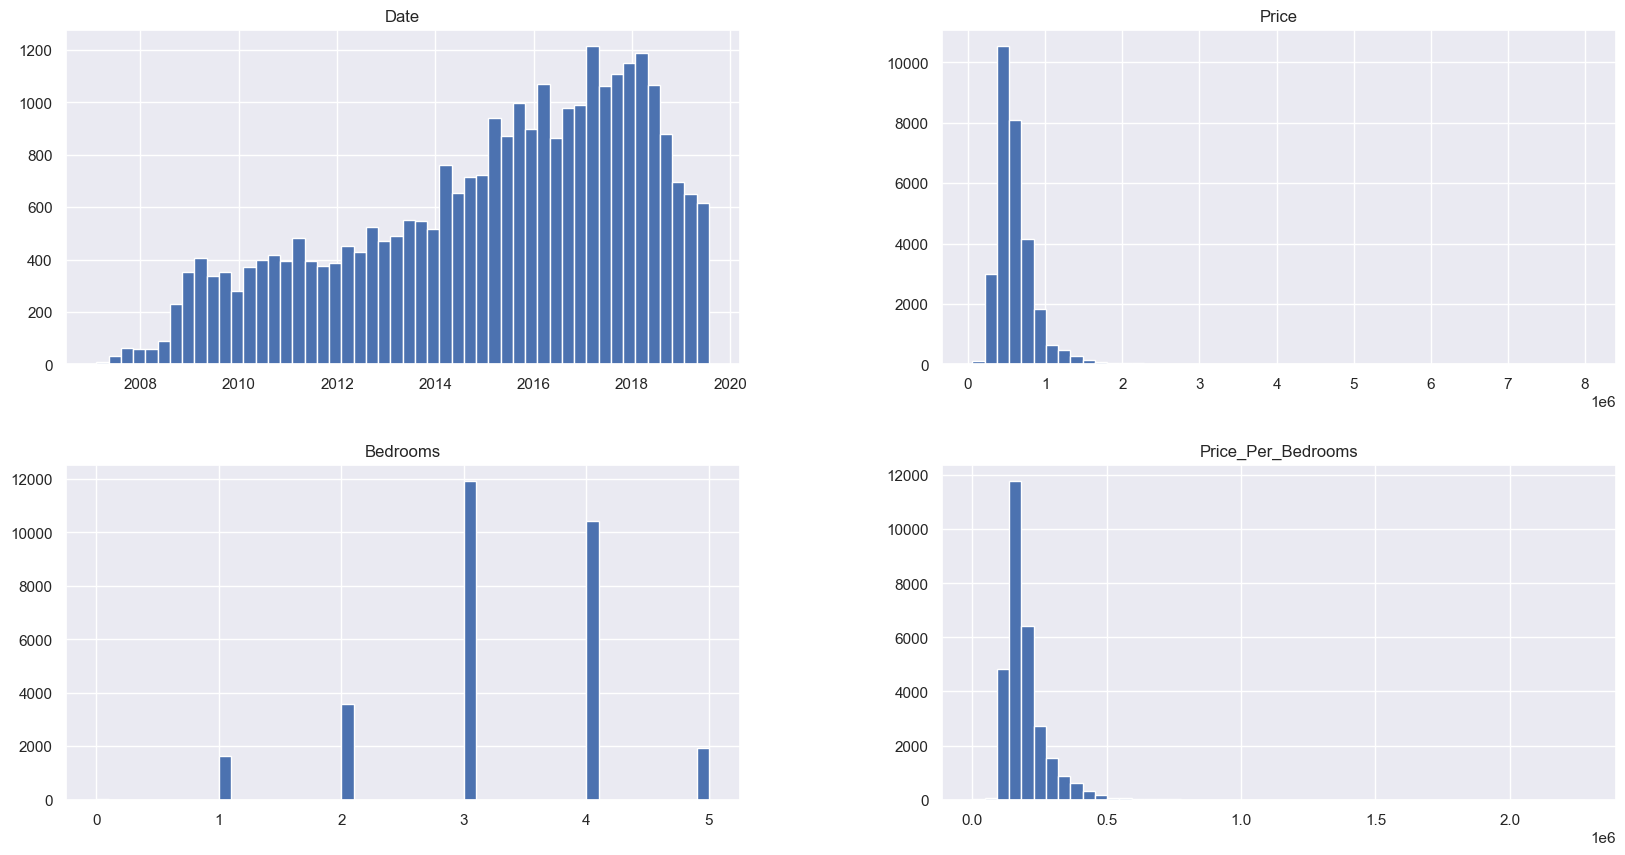

In [14]:
%matplotlib inline 
import matplotlib.pyplot as plt
df_copy.hist(bins=50, figsize=(20,10))
plt.show()

##### *Insights Numerical Features*  
*  *The Price & The Price_Per_Bedrooms Features are Right Skewied --> The Mean value is higher than the median value & and both having outliers*  
*  *For The Date Feature  the date range from 2007-02-07 to 2019-07-27 & the most repaeated year in 2017* 
* *--> We will transform both features (The Price & The Price_Per_Bedrooms) to be normally distributed*


#### *Categotical Features*

In [15]:
df_copy.describe(include="object")

,Region_code,Property_type,Bedrooms_str,year,month_name,day_name
count,29580,29580,29580,29580,29580,29580
unique,27,2,6,13,12,7
top,2615,house,Three_bedrooms,2017,November,Friday
freq,3566,24552,11933,4541,3102,5463


##### *Visualzing Categotical Features*

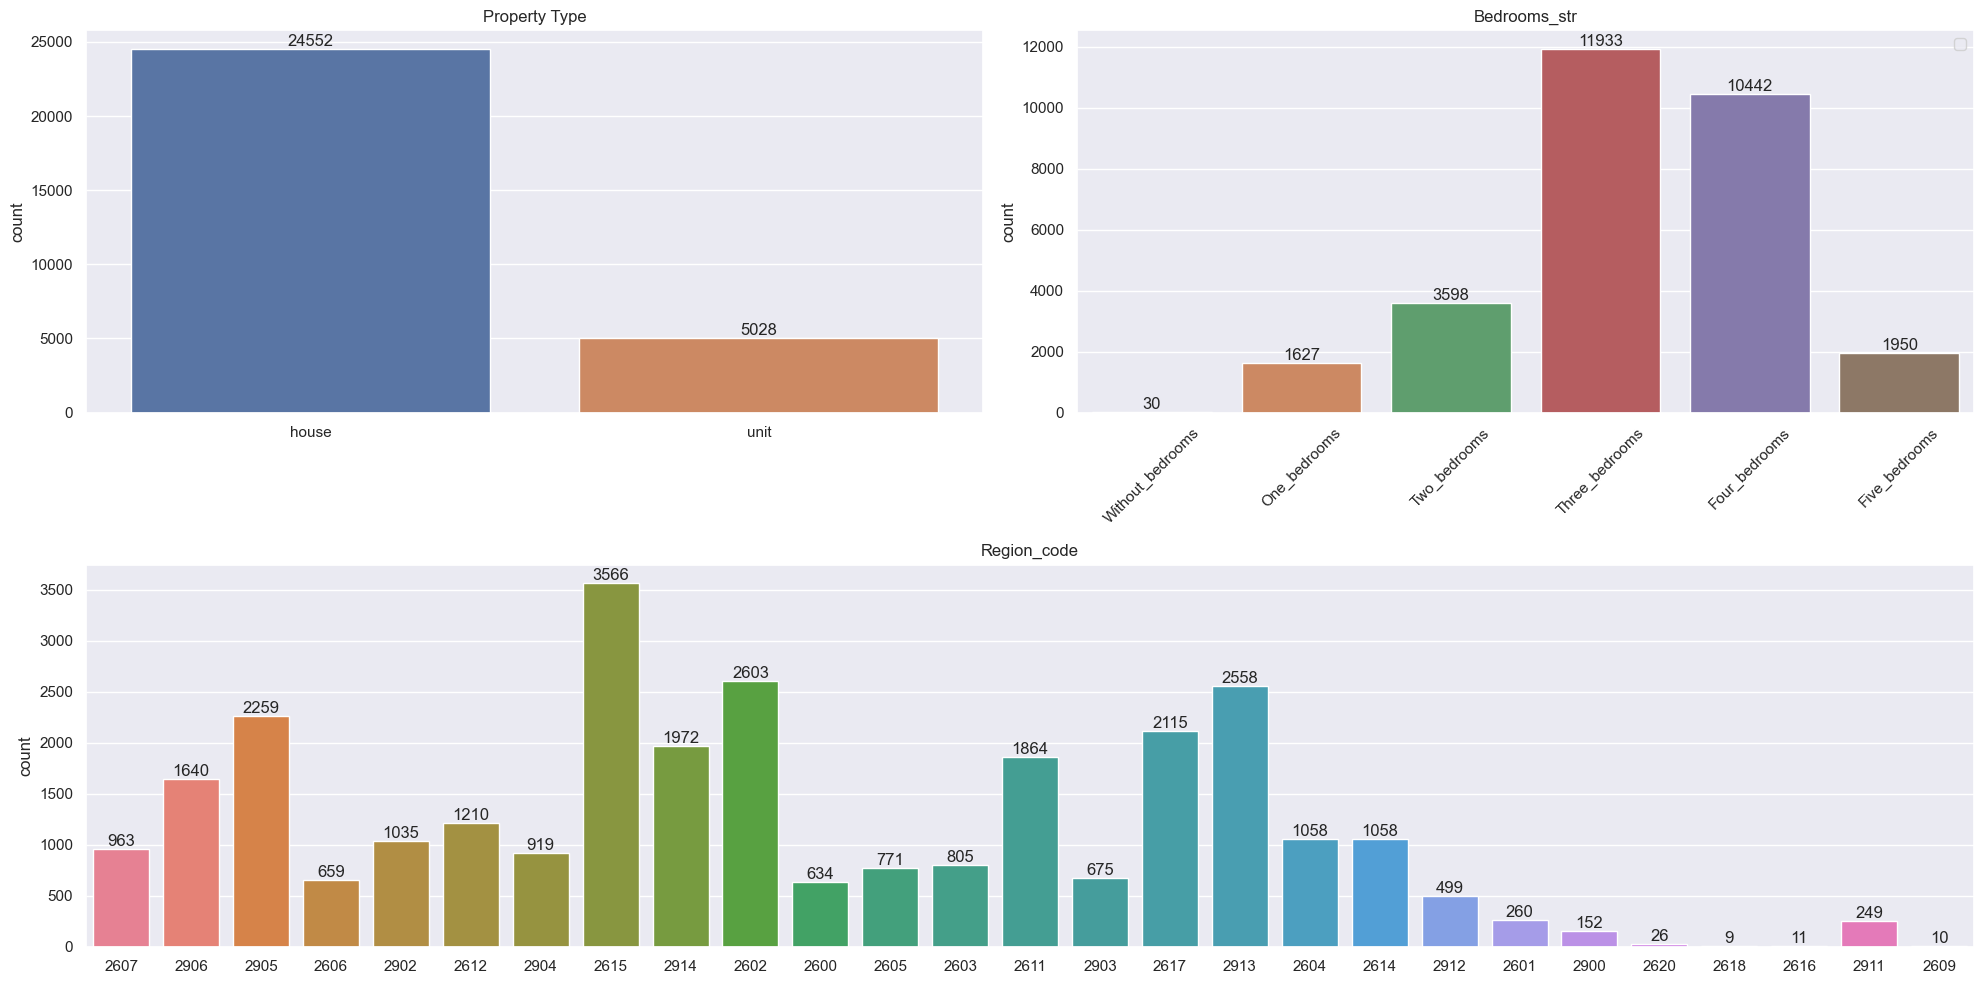

In [16]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
sns.countplot(data=df_copy, x="Property_type", ax=ax1,hue='Property_type')
ax1.set_title("Property Type")
ax1.set_xlabel("")
for container in ax1.containers:
    ax1.bar_label(container)

ax2 = fig.add_subplot(gs[0, 1])
Bedrooms_str_order=['Without_bedrooms', 'One_bedrooms', 'Two_bedrooms', 'Three_bedrooms', 'Four_bedrooms', 'Five_bedrooms']
sns.countplot(data=df_copy, x="Bedrooms", ax=ax2,hue='Bedrooms_str')
ax2.set_xticklabels(Bedrooms_str_order, rotation=45)
ax2.legend("")
ax2.set_title("Bedrooms_str")
ax2.set_xlabel("")
for container in ax2.containers:
    ax2.bar_label(container)

ax3 = fig.add_subplot(gs[1, :])
sns.countplot(data=df_copy, x="Region_code", ax=ax3,hue='Region_code')
ax3.set_title("Region_code")
ax3.set_xlabel("")
for container in ax3.containers:
    ax3.bar_label(container)   

plt.tight_layout()
plt.show()

##### *Insights Categotical Features*  
*  *The Properties has two Unique Types (house & unit) , & Houses Count is more than Units*  
*  *The Max Number of bedrooms are 6 ,& the Properties with 3 Bedrooms is the most frequent sold & Properties with 0 Bedrooms is the lowest* 
*  *The Region code has 27 unique Regions and the Region number 2615 is the most frequent Region that properties been sold in & The Region code number 2618 is the lowest*  
* *--> We will apply features Encoding*

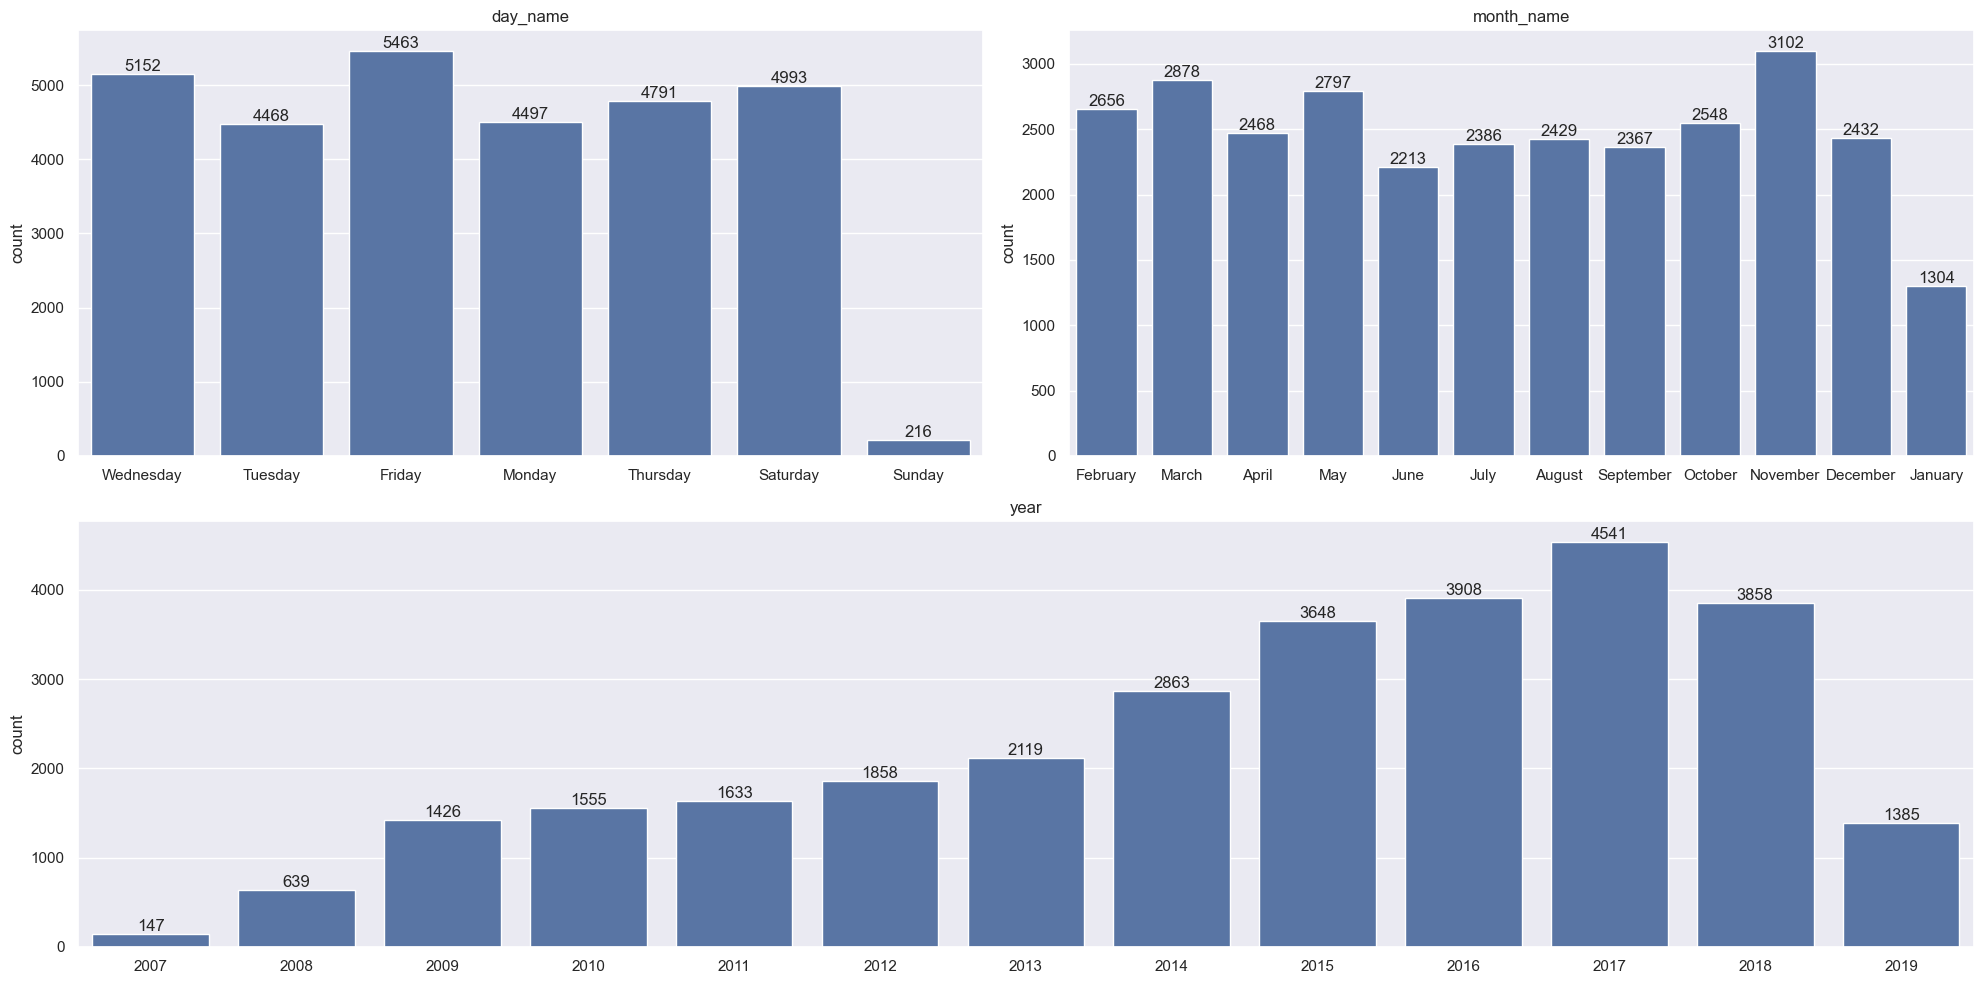

In [17]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
sns.countplot(data=df_copy, x="day_name", ax=ax1)
ax1.set_title("day_name")
ax1.set_xlabel("")
for container in ax1.containers:
    ax1.bar_label(container)

ax2 = fig.add_subplot(gs[0, 1])
sns.countplot(data=df_copy, x="month_name", ax=ax2)
ax2.set_title("month_name")
ax2.set_xlabel("")
for container in ax2.containers:
    ax2.bar_label(container)

ax3 = fig.add_subplot(gs[1, :])
sns.countplot(data=df_copy, x="year", ax=ax3)
ax3.set_title("year")
ax3.set_xlabel("")
for container in ax3.containers:
    ax3.bar_label(container)   

plt.tight_layout()
plt.show()

##### *Other Insights Categotical Features*  
*  *Friday is The most selling day and Sunday the lowest selleing day*  
*  *Nobember is The most selling month and January the lowest selleing day*
*  *The year 2017 is The most selling year and 2007 the lowest selleing year* 
*  *The Number of selling was growing on yearly basis from 2007 untill 2017 , then we noticed drop in 2018 and 2019*

*Targrt Feature : Property Type:*

In [18]:
categorical_features=df_copy.select_dtypes(include=["object"])
numerical_features=df_copy.select_dtypes(exclude=["object","datetime64[ns]"])
date_features=df_copy.select_dtypes(include=["datetime64[ns]"])

In [19]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                29580 non-null  datetime64[ns]
 1   Region_code         29580 non-null  object        
 2   Price               29580 non-null  int64         
 3   Property_type       29580 non-null  object        
 4   Bedrooms            29580 non-null  int64         
 5   Bedrooms_str        29580 non-null  object        
 6   year                29580 non-null  object        
 7   month_name          29580 non-null  object        
 8   day_name            29580 non-null  object        
 9   Price_Per_Bedrooms  29580 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 2.3+ MB


---
### *Inferential Data Analysis*

*Checking the data normanlity*

In [22]:
from scipy.stats import shapiro
stat, p = shapiro(df_copy["Price"])
print(f"W = {stat:.3f}, p = {p:.3f}")
if p < 0.05:
    print("Reject H₀ → distribution is not normal")
else:
    print("Fail to reject H₀ → distribution is compatible with normality")

W = 0.757, p = 0.000
Reject H₀ → distribution is not normal


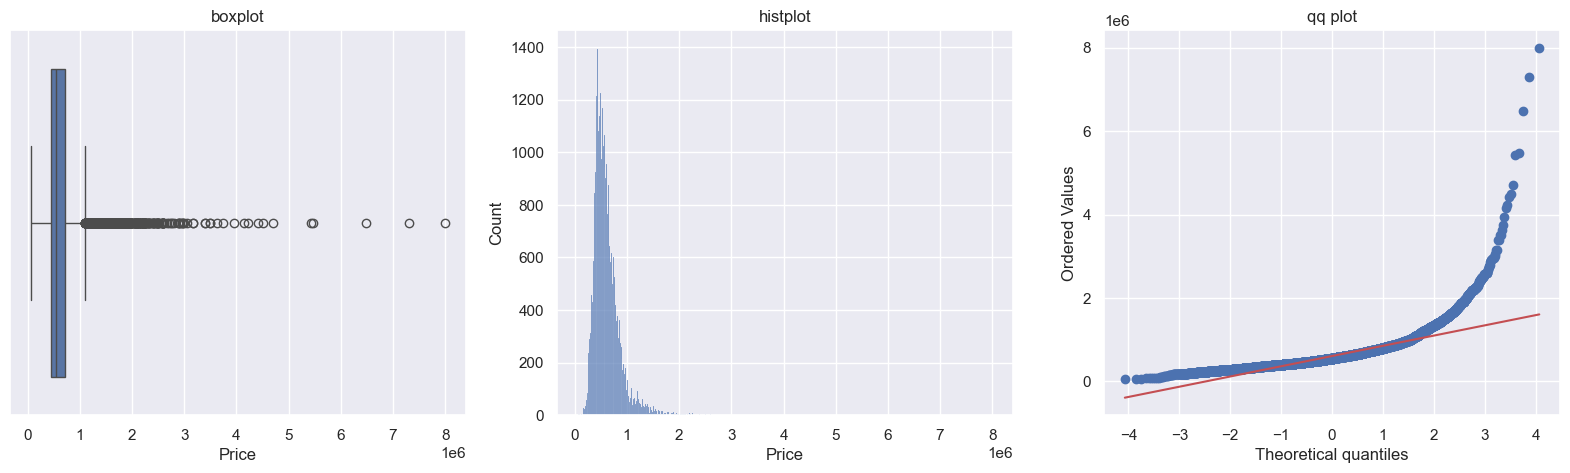

In [23]:
matplotlib.rcParams["figure.figsize"]=(20,5)

import scipy.stats as stats
plt.subplot(131)
sns.boxplot(x=df_copy["Price"])
plt.title("boxplot")
plt.subplot(132)
sns.histplot(x=df_copy["Price"]);
plt.title("histplot")
plt.subplot(133)
stats.probplot(df_copy["Price"], dist="norm", plot=plt)
plt.title("qq plot")

plt.show()

### *--> Non parametric tests:*

* *Price VS Property_type*

In [25]:
from scipy.stats import mannwhitneyu
group1 = df_copy[df_copy["Property_type"] == "house"]["Price"]
group2 = df_copy[df_copy["Property_type"] == "unit"]["Price"]

stat, p = mannwhitneyu(group1, group2, alternative="two-sided")
if p < 0.05: 
    print(f"Kruskal-Wallis Test: Statistic={stat}, P-value={p} ==>\n The p value less than 0.05 ==> Significant difference between the two groups")
else:
    print(f"Kruskal-Wallis Test: Statistic={stat}, P-value={p} ==>\n the p value more than 0.05 ==> No Significant difference between the two groups")

Kruskal-Wallis Test: Statistic=102291684.0, P-value=0.0 ==>
 The p value less than 0.05 ==> Significant difference between the two groups


* *Price VS Bedrooms_str*

In [26]:
from scipy.stats import kruskal
groups = [df_copy[df_copy["Bedrooms_str"] == level]["Price"] for level in df_copy["Bedrooms_str"].unique()]

stat, p = kruskal(*groups)
if p < 0.05: 
    print(f"Kruskal-Wallis Test: Statistic={stat}, P-value={p} ==>\n The p value less than 0.05 ==> At least one group has Significant difference")
else:
    print(f"Kruskal-Wallis Test: Statistic={stat}, P-value={p} ==>\n the p value more than 0.05 ==> No Significant difference between groups")

Kruskal-Wallis Test: Statistic=12049.881668208302, P-value=0.0 ==>
 The p value less than 0.05 ==> At least one group has Significant difference


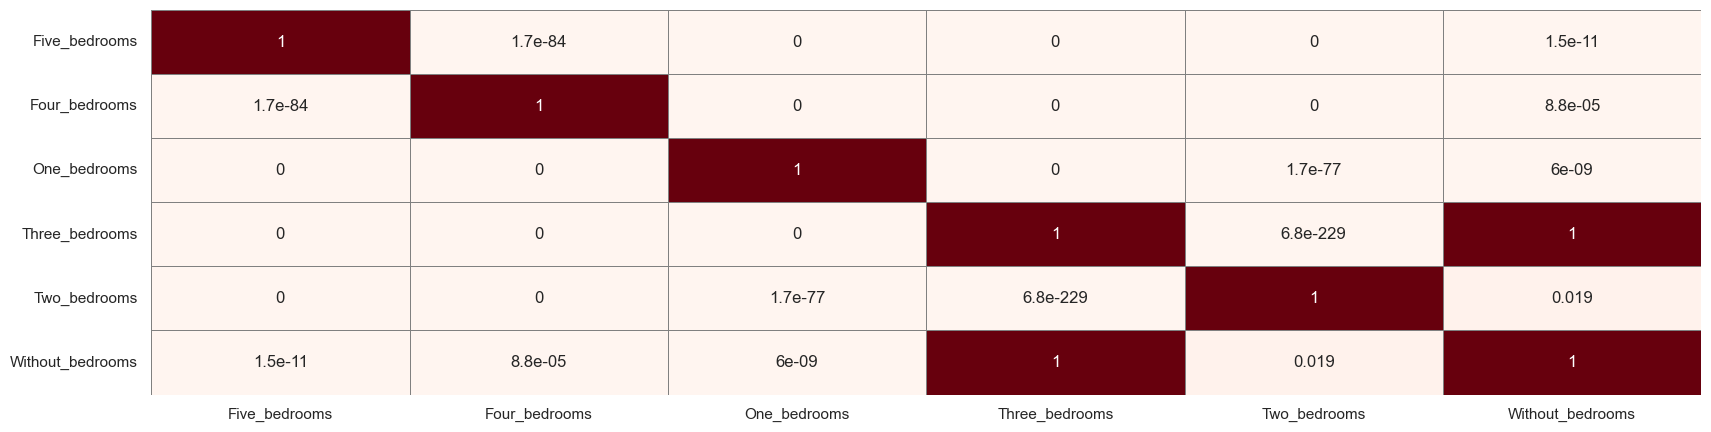

In [27]:
import scikit_posthocs as sp
posthoc = sp.posthoc_dunn(df_copy, val_col='Price', group_col='Bedrooms_str', p_adjust='bonferroni')
sns.heatmap(posthoc,annot=True,cmap="Reds", cbar=False, linewidths=0.5, linecolor='gray');

* *Price VS month_name*

In [28]:
groups = [df_copy[df_copy["month_name"] == level]["Price"] for level in df_copy["month_name"].unique()]

stat, p = kruskal(*groups)
if p < 0.05: 
    print(f"Kruskal-Wallis Test: Statistic={stat}, P-value={p} ==>\n The p value less than 0.05 ==> At least one group has Significant difference")
else:
    print(f"Kruskal-Wallis Test: Statistic={stat}, P-value={p} ==>\n the p value more than 0.05 ==> No Significant difference between groups")

Kruskal-Wallis Test: Statistic=163.60514777745755, P-value=2.4346852576775613e-29 ==>
 The p value less than 0.05 ==> At least one group has Significant difference


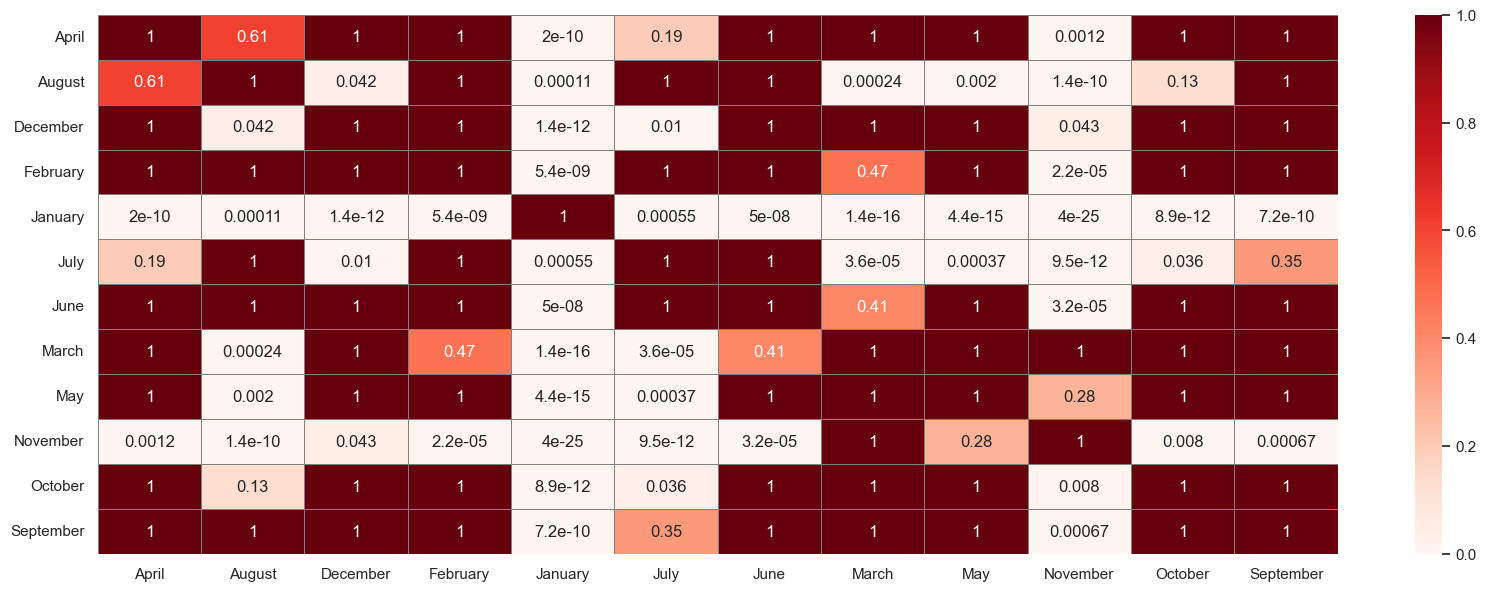

In [29]:
import scikit_posthocs as sp
posthoc = sp.posthoc_dunn(df_copy, val_col='Price', group_col='month_name', p_adjust='bonferroni')
matplotlib.rcParams["figure.figsize"]=(20,7)
sns.heatmap(posthoc,annot=True,cmap="Reds", cbar=True, linewidths=0.5, linecolor='gray');

* *Price VS day_name*

In [30]:
groups = [df_copy[df_copy["day_name"] == level]["Price"] for level in df_copy["day_name"].unique()]

stat, p = kruskal(*groups)
if p < 0.05: 
    print(f"Kruskal-Wallis Test: Statistic={stat}, P-value={p} ==>\n The p value less than 0.05 ==> At least one group has Significant difference")
else:
    print(f"Kruskal-Wallis Test: Statistic={stat}, P-value={p} ==>\n the p value more than 0.05 ==> No Significant difference between groups")

Kruskal-Wallis Test: Statistic=2695.5376379865097, P-value=0.0 ==>
 The p value less than 0.05 ==> At least one group has Significant difference


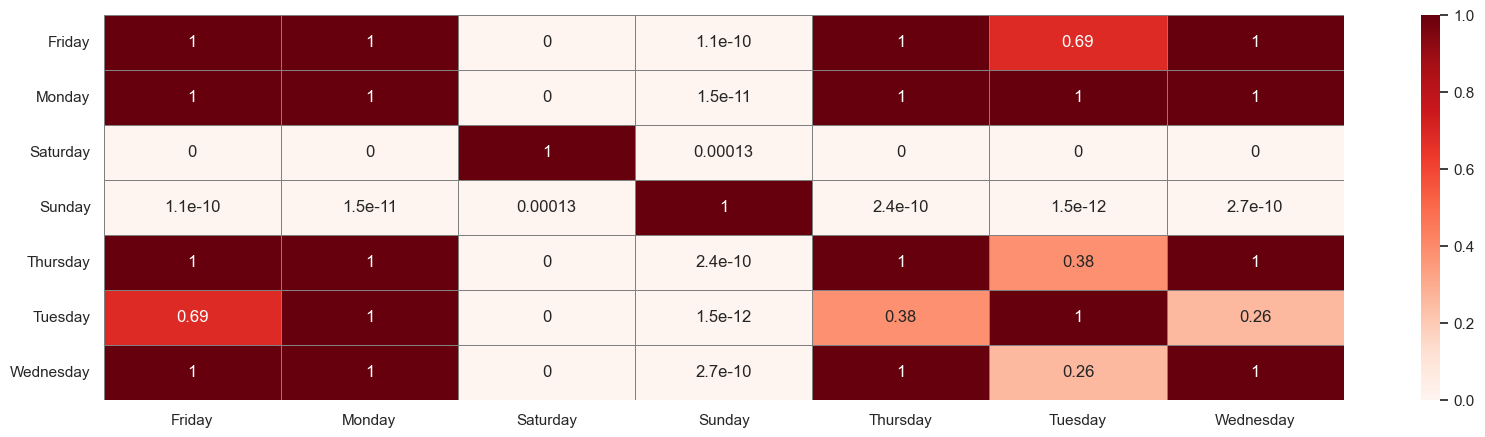

In [31]:
import scikit_posthocs as sp
posthoc = sp.posthoc_dunn(df_copy, val_col='Price', group_col='day_name', p_adjust='bonferroni')
matplotlib.rcParams["figure.figsize"]=(20,5)
sns.heatmap(posthoc,annot=True,cmap="Reds", cbar=True, linewidths=0.5, linecolor='gray');

* *Price VS year*

In [32]:
groups = [df_copy[df_copy["year"] == level]["Price"] for level in df_copy["year"].unique()]

stat, p = kruskal(*groups)
if p < 0.05: 
    print(f"Kruskal-Wallis Test: Statistic={stat}, P-value={p} ==>\n The p value less than 0.05 ==> At least one group has Significant difference")
else:
    print(f"Kruskal-Wallis Test: Statistic={stat}, P-value={p} ==>\n the p value more than 0.05 ==> No Significant difference between groups")

Kruskal-Wallis Test: Statistic=1482.6287716488123, P-value=2.11358113173826e-310 ==>
 The p value less than 0.05 ==> At least one group has Significant difference


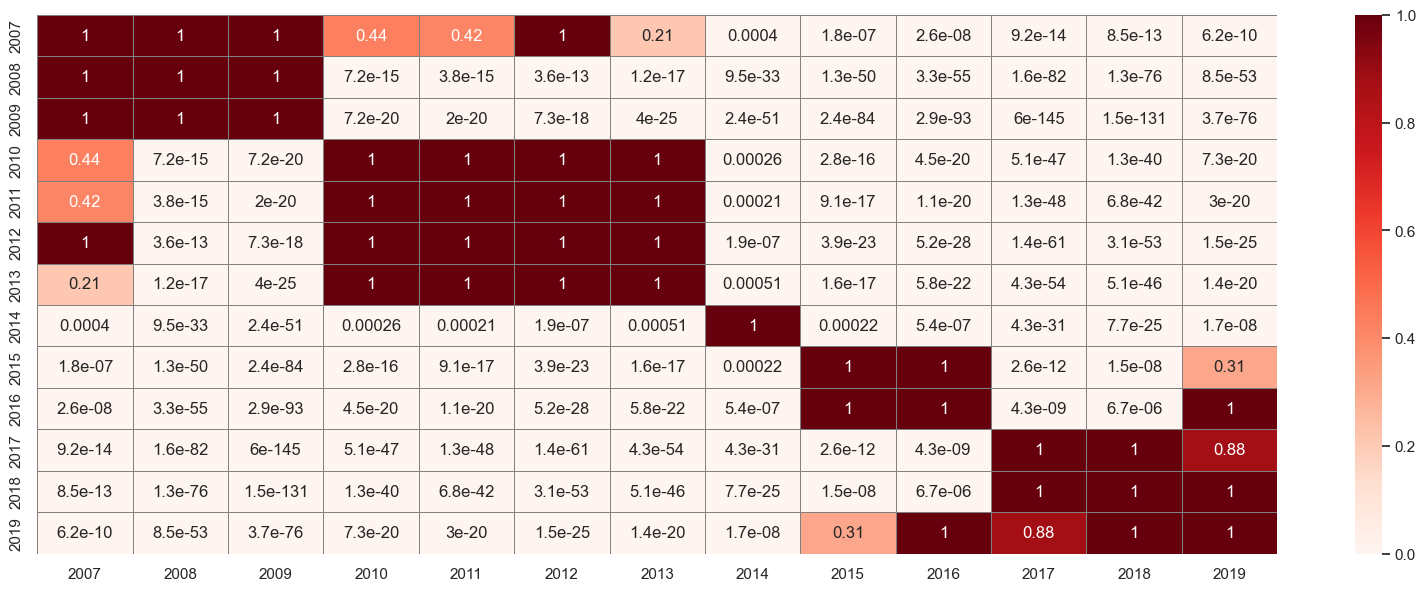

In [33]:
import scikit_posthocs as sp
posthoc = sp.posthoc_dunn(df_copy, val_col='Price', group_col='year', p_adjust='bonferroni')
matplotlib.rcParams["figure.figsize"]=(20,7)
sns.heatmap(posthoc,annot=True,cmap="Reds", cbar=True, linewidths=0.5, linecolor='gray');

In [34]:
groups = [df_copy[df_copy["Region_code"] == level]["Price"] for level in df_copy["Region_code"].unique()]

stat, p = kruskal(*groups)
if p < 0.05: 
    print(f"Kruskal-Wallis Test: Statistic={stat}, P-value={p} ==>\n The p value less than 0.05 ==> At least one group has Significant difference")
else:
    print(f"Kruskal-Wallis Test: Statistic={stat}, P-value={p} ==>\n the p value more than 0.05 ==> No Significant difference between groups")

Kruskal-Wallis Test: Statistic=4288.8272729167065, P-value=0.0 ==>
 The p value less than 0.05 ==> At least one group has Significant difference


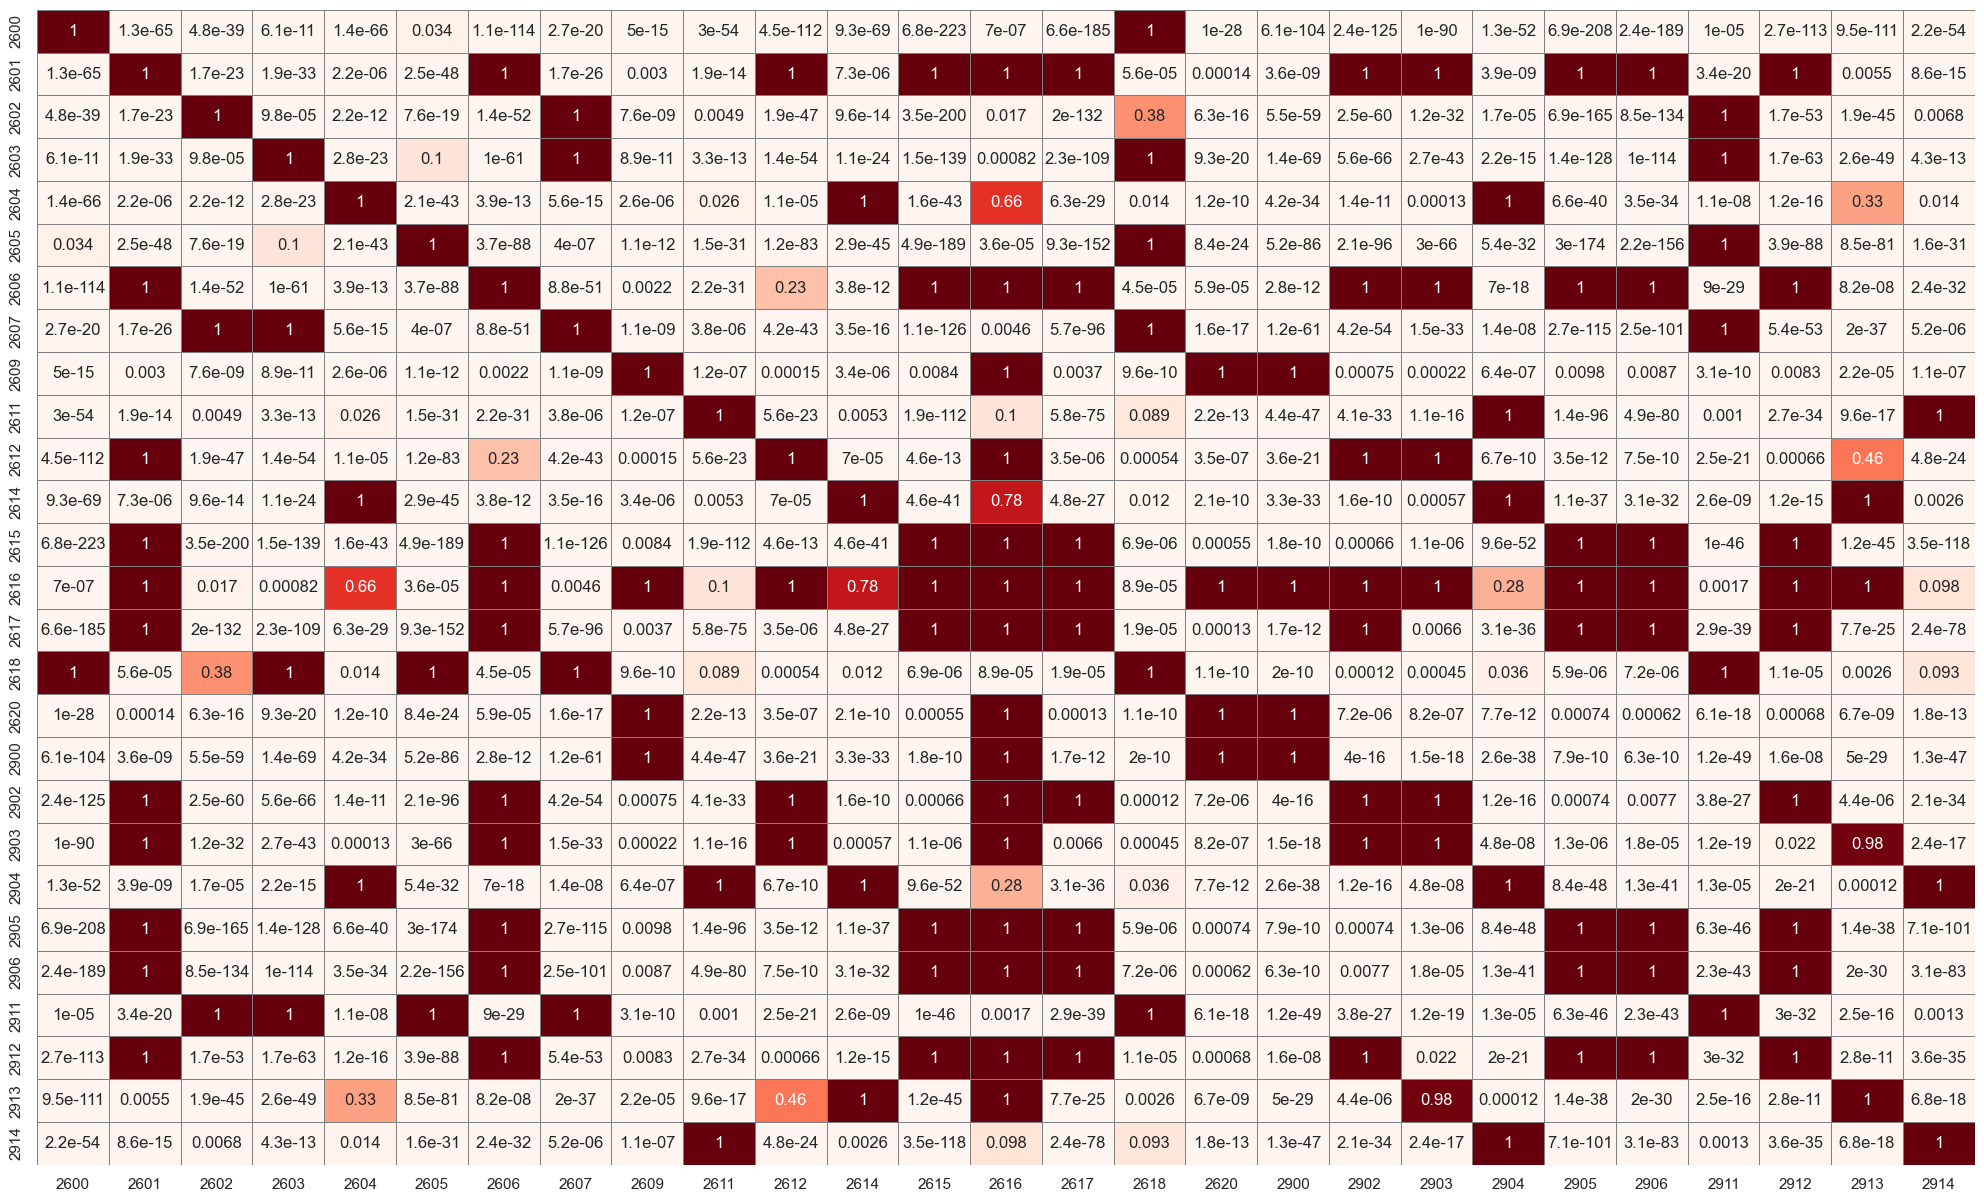

In [35]:
import scikit_posthocs as sp
posthoc = sp.posthoc_dunn(df_copy, val_col='Price', group_col='Region_code', p_adjust='bonferroni')
matplotlib.rcParams["figure.figsize"]=(25,15)
sns.heatmap(posthoc,annot=True,cmap="Reds", cbar=False, linewidths=0.5, linecolor='gray');

---
---

* *categorical Features Encoding*

In [36]:
df_copy2=df_copy.copy()
one_hot_encoded_data = pd.get_dummies(df_copy2[categorical_features.columns.to_list()])
one_hot_encoded_data=one_hot_encoded_data.applymap(lambda x:1 if x is True else 0 )
df_one_hot_encoded_data=pd.concat([df_copy2,one_hot_encoded_data],axis=1)
df_copy3=df_one_hot_encoded_data.drop(categorical_features.columns.to_list(),axis=1)
df_copy3.head(2)

,Date,Price,Bedrooms,Price_Per_Bedrooms,Region_code_2600,Region_code_2601,Region_code_2602,Region_code_2603,Region_code_2604,Region_code_2605,...,month_name_November,month_name_October,month_name_September,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,2007-02-07,525000,4,131250.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2007-02-27,290000,3,96667.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
# we will drop Date , Bedrooms as we alrady encoded them
df_copy3=df_copy3.drop(["Date","Bedrooms"],axis=1)
df_copy3.head(2)

,Price,Price_Per_Bedrooms,Region_code_2600,Region_code_2601,Region_code_2602,Region_code_2603,Region_code_2604,Region_code_2605,Region_code_2606,Region_code_2607,...,month_name_November,month_name_October,month_name_September,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,525000,131250.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,290000,96667.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## *Feature Selection :*
* *We will apply SelectKBest to find the best features:*

In [38]:
x=df_copy3.drop("Price",axis=1)
y=df_copy3["Price"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.3, random_state=42)
x.shape

(29580, 68)

In [39]:
# The methods based on F-test estimate the degree of linear dependency between two random variables
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import GradientBoostingRegressor

In [40]:
mean_squared_error_list=[]
for k in range(1,68):
    selector=SelectKBest(f_regression,k=k).fit(x_train,y_train)
    selector.fit(x_train,y_train)

    selec_x_train=selector.transform(x_train)
    selec_x_test=selector.transform(x_test)

    sgd_reg = GradientBoostingRegressor()
    sgd_reg.fit(selec_x_train, y_train)

    from sklearn.metrics import mean_squared_error

    SelectKBest_method_mse=round(mean_squared_error(y_test,sgd_reg.predict(selec_x_test)),3)
    mean_squared_error_list.append(SelectKBest_method_mse)

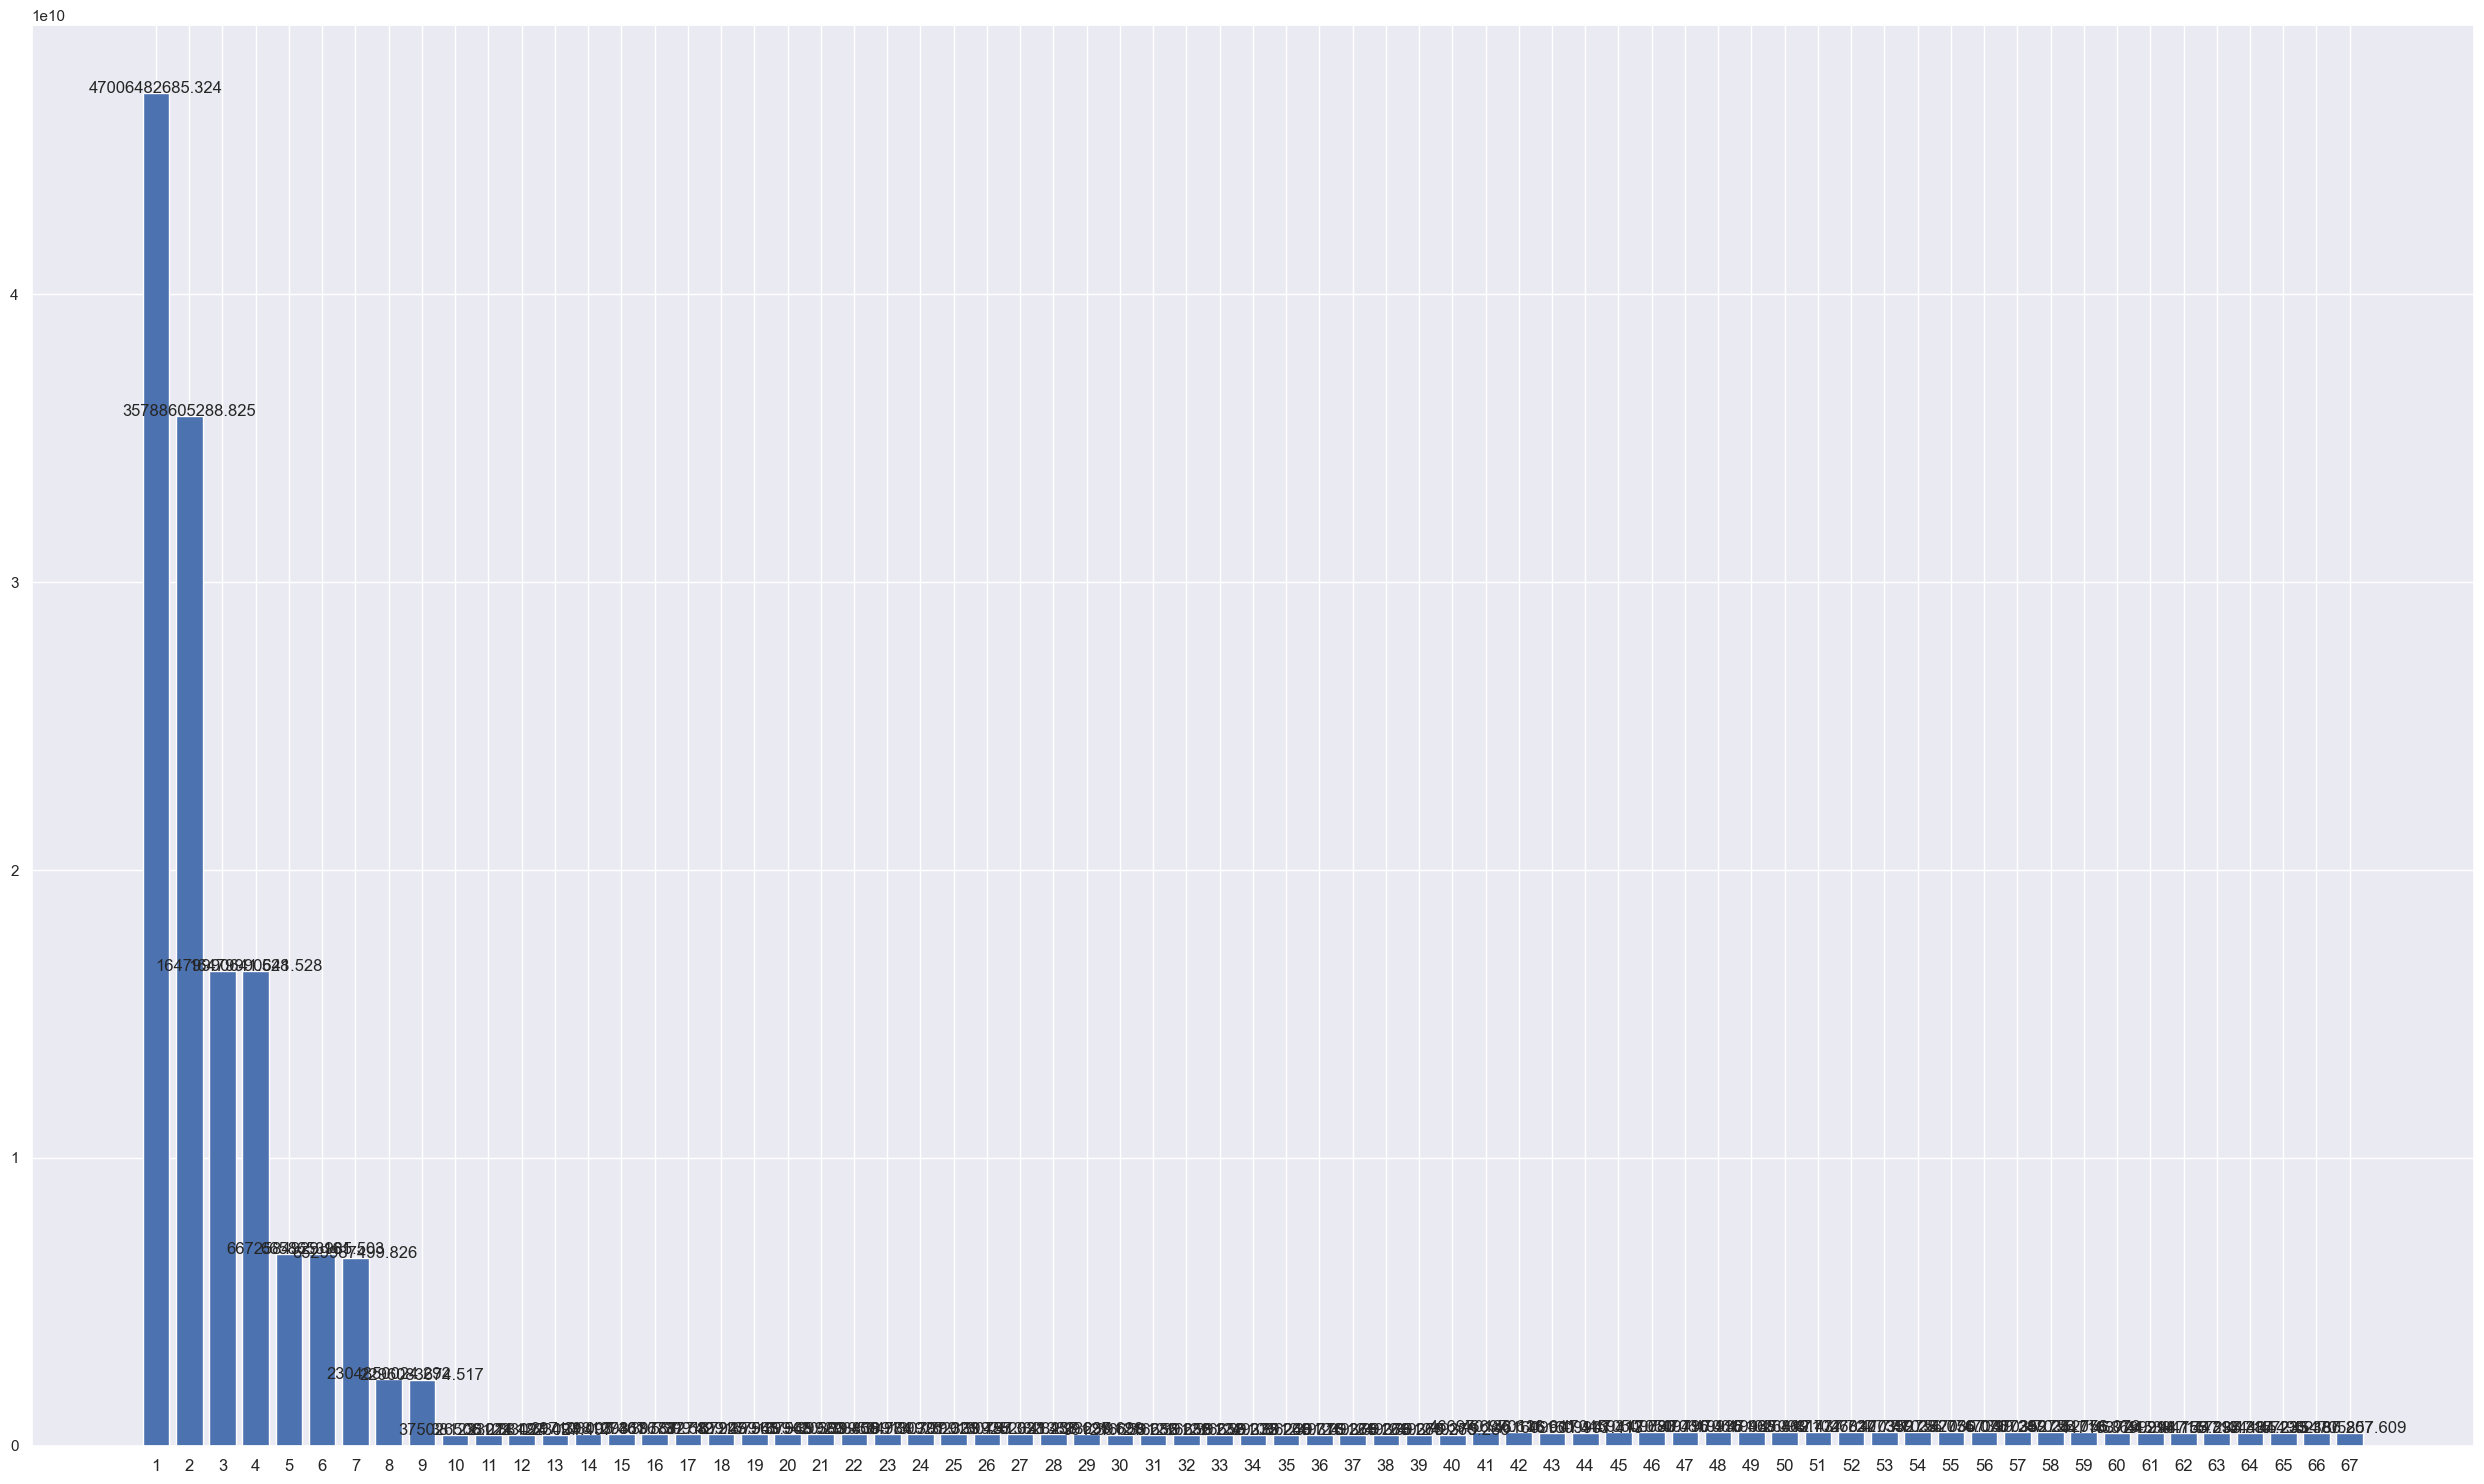

In [41]:
fig,ax=plt.subplots()
x=np.arange(1,68)
y=mean_squared_error_list
ax.bar(x,y)
#ax.set_ylim(0,1.2)
ax.set_xticks(np.arange(1,68))
ax.set_xticklabels(np.arange(1,68),fontsize=12)

for i ,v in enumerate(y):
    plt.text(x=i+1,y=v+0.05,s=str(v),ha='center')
plt.tight_layout()   

In [42]:
seletor=SelectKBest(f_regression,k=10)
seletor.fit(x_train,y_train)
seletor_mask=seletor.get_support()
bestfeaturelist=list(x_train.columns[seletor_mask])

In [43]:
bestfeaturelist

['Price_Per_Bedrooms',
 'Region_code_2600',
 'Region_code_2603',
 'Property_type_house',
 'Property_type_unit',
 'Bedrooms_str_Five_bedrooms',
 'Bedrooms_str_Four_bedrooms',
 'Bedrooms_str_One_bedrooms',
 'Bedrooms_str_Two_bedrooms',
 'day_name_Saturday']

---
## *Machine Learning*

In [45]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


x=df_copy3[bestfeaturelist]
y=df_copy3["Price"]

numeric_transformer = StandardScaler()

transform_columns = ["Price_Per_Bedrooms"]
num_features = ["Price_Per_Bedrooms"]


transform_pipe = Pipeline(steps=[
                ('transformer', PowerTransformer(method='yeo-johnson'))

            ])
preprocessor = ColumnTransformer(
                [
                    ("Transformer", transform_pipe, transform_columns),
                    ("StandardScaler", numeric_transformer, num_features),
                    
                ]
            )

preprocessed_data=preprocessor.fit_transform(x)

In [49]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    #for m in range(1, len(X_train)):
    for m in range(1, 50):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val") 

In [50]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor,Lasso,Ridge,LinearRegression
import xgboost
lasso_reg = Lasso(alpha=0.1)
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
sgd_reg = SGDRegressor()
lin_reg = LinearRegression()

estimators = [
    ("Linear Regression", lin_reg),
    ("SGD Regression", sgd_reg),
    ("Ridge Regression", ridge_reg),
    ("Lasso Regression", lasso_reg),
    ("Random Forest Redgression", RandomForestRegressor()),
    ("Bagging Redgression", BaggingRegressor(
                            DecisionTreeRegressor(), n_estimators=500)),
    ("AdaBoost Redgression", AdaBoostRegressor(DecisionTreeRegressor())),
    
    ("GradientBoosting Redgression", GradientBoostingRegressor()),
    ("xgboost Redgression", xgboost.XGBRegressor()),
    ("XGBRF Redgression", xgboost.XGBRFRegressor())
]

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def plot_multiple_learning_curves(estimators, data, target, seed=None, cols=2, figsize=(25, 10)):
    if seed is not None:
        np.random.seed(seed)
    
    n = len(estimators)
    rows = (n + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()
    
    for ax, (name, est) in zip(axes, estimators):
        plt.sca(ax)  # set current axis
        plot_learning_curves(est, data, target)
        ax.set_title(f"Learning Curves: {name}")
        ax.legend()
    
    # Turn off any unused subplots
    for ax in axes[n:]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()


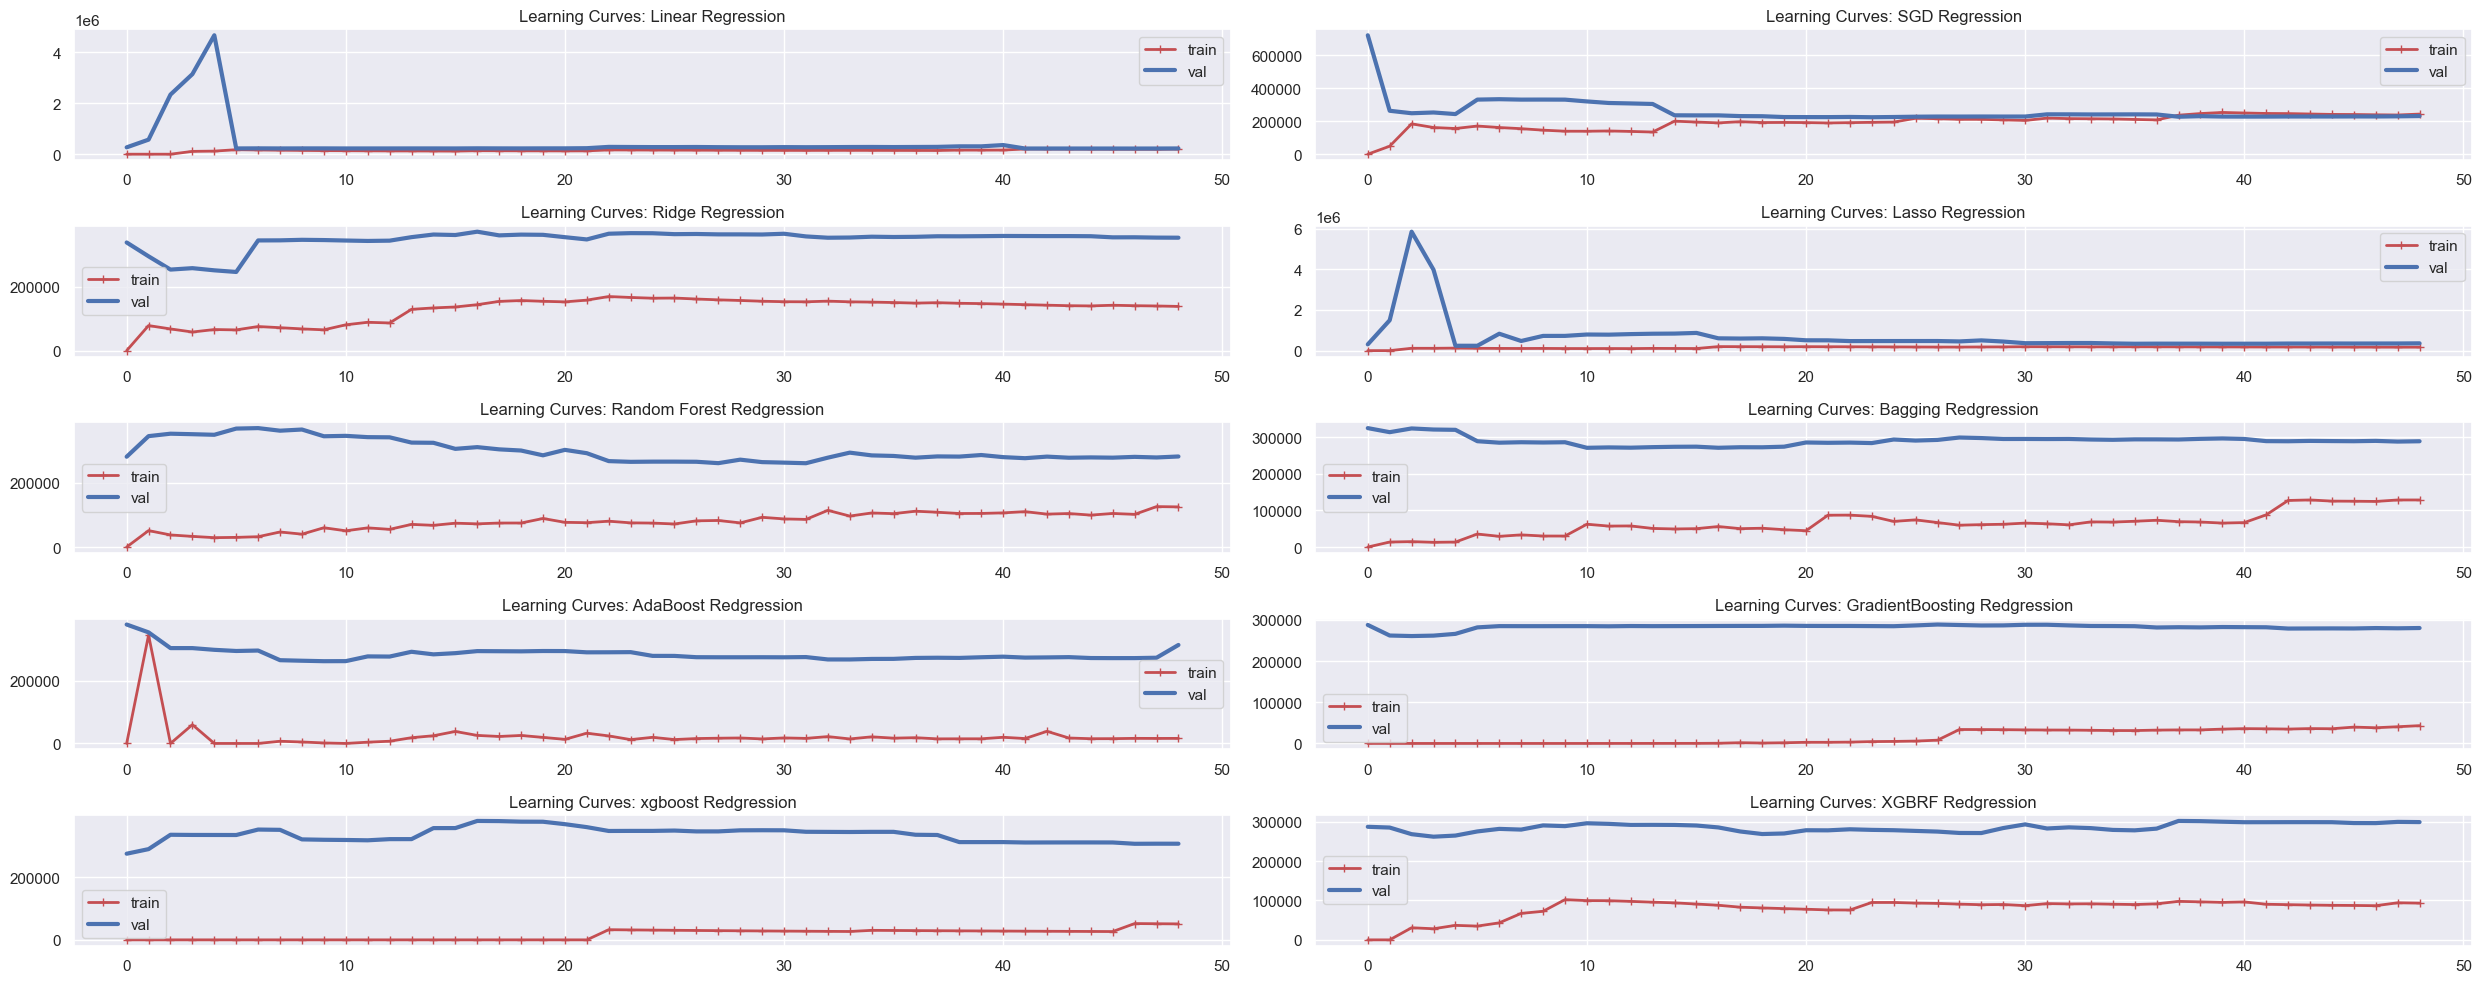

In [52]:
plot_multiple_learning_curves(estimators, preprocessed_data, y, seed=42, cols=2)

In [53]:
x_train, x_val, y_train, y_val = train_test_split(preprocessed_data, y, test_size=0.2)
sgd_reg = SGDRegressor()
sgd_reg.fit(x_train,y_train)
sgd_pred=sgd_reg.predict(x_val)
mean_squared_error(y_val,sgd_pred)

54370778106.24336

In [58]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param_dist = {
    'alpha': loguniform(1e-5, 1e-1),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': loguniform(1e-4, 1e-1),
}

rnd_search = RandomizedSearchCV(
    SGDRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=50, cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)
rnd_search.fit(x_train, y_train)

print("Best params:", rnd_search.best_params_)



Best params: {'alpha': 0.002440060709081752, 'eta0': 0.0021751953118777645, 'learning_rate': 'invscaling', 'penalty': 'elasticnet'}


In [59]:
from sklearn.model_selection import GridSearchCV

best = rnd_search.best_params_

param_grid = {
    'alpha': [best['alpha'] * f for f in [0.5, 1, 2]],
    'penalty': [best['penalty']],
    'learning_rate': [best['learning_rate']],
    'eta0': [best['eta0'] * f for f in [0.5, 1, 2]],
    'max_iter': [1000, 2000],
}

grid_search = GridSearchCV(
    SGDRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    return_train_score=True
)
grid_search.fit(x_train, y_train)

print("Best CV params:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)


Best CV params: {'alpha': 0.001220030354540876, 'eta0': 0.0021751953118777645, 'learning_rate': 'invscaling', 'max_iter': 1000, 'penalty': 'elasticnet'}
Best CV score: -50478197485.515015


In [67]:
#grid_search.cv_results_

In [72]:
best_model = grid_search.best_estimator_
best_model.fit(x_test, y_test)
best_model_pred=best_model.predict(x_test)
print("Test R²:", best_model.score(x_test, y_test))
print(mean_squared_error(y_test,best_model_pred))

Test R²: -3.368722903186512e+25
2.285396029310032e+36
